<a href="https://colab.research.google.com/github/SAICHANDUALURI/KDM-ICP-12/blob/main/KDM_ICP12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping

In [101]:
Data = pd.read_csv('/TSLA.csv')
Data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000
...,...,...,...,...,...,...,...
1254,2020-07-02,244.296005,245.600006,237.119995,241.731995,241.731995,86250500
1255,2020-07-06,255.337997,275.558014,253.207993,274.316010,274.316010,102849500
1256,2020-07-07,281.002014,285.899994,267.342010,277.971985,277.971985,107448500
1257,2020-07-08,281.000000,283.451996,262.268005,273.175995,273.175995,81556500


In [102]:
training_set = Data.iloc[:800, 1:2].values
test_set = Data.iloc[800:, 1:2].values

In [103]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [104]:
X_train = []
y_train = []
for i in range(60, 577):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [105]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [106]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [107]:
model.fit(X_train, y_train, epochs = 25, batch_size = 32)


Epoch 1/25
17/17 [==============================] - 6s 79ms/step - loss: 0.0973
Epoch 2/25
17/17 [==============================] - 1s 84ms/step - loss: 0.0171
Epoch 3/25
17/17 [==============================] - 1s 86ms/step - loss: 0.0122
Epoch 4/25
17/17 [==============================] - 1s 82ms/step - loss: 0.0122
Epoch 5/25
17/17 [==============================] - 1s 85ms/step - loss: 0.0099
Epoch 6/25
17/17 [==============================] - 1s 85ms/step - loss: 0.0096
Epoch 7/25
17/17 [==============================] - 1s 83ms/step - loss: 0.0095
Epoch 8/25
17/17 [==============================] - 1s 85ms/step - loss: 0.0089
Epoch 9/25
17/17 [==============================] - 1s 85ms/step - loss: 0.0114
Epoch 10/25
17/17 [==============================] - 1s 85ms/step - loss: 0.0085
Epoch 11/25
17/17 [==============================] - 1s 85ms/step - loss: 0.0086
Epoch 12/25
17/17 [==============================] - 1s 85ms/step - loss: 0.0076
Epoch 13/25
17/17 [==================

In [108]:
dataset_train = Data.iloc[:800, 1:2]
dataset_test = Data.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(459, 60, 1)


In [109]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

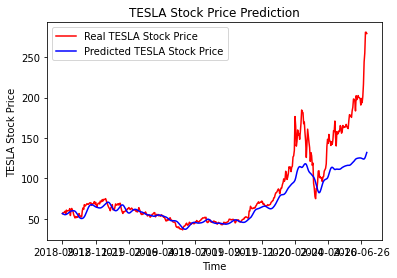

In [110]:
plt.plot(Data.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(Data.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()